In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
Sdata = np.array([1000,200,50,10])
Vdata = np.array([3100,2100,850,66])
Verr = np.array([600,300,110,15])
Vmeanerr = np.array([600,300,110,15])/np.sqrt(5)

f = lambda S,Vm,Km: Vm * S/(S + Km)
p0 = [5000,500]
#popt,pcov = curve_fit(f, Sdata, Vdata, sigma=Verr)
popt,pcov = curve_fit(f, Sdata, Vdata, p0=p0)
print(pcov)
Vm = popt[0]
dVm = np.sqrt(pcov[0][0])
Km = popt[1]
dKm = np.sqrt(pcov[1][1])
print(Vm, dVm)
print(Km, dKm)

[[38036.40466922  4234.63477506]
 [ 4234.63477506   715.92717986]]
3612.521609212996 195.02924054925356
155.65224619784337 26.756815577743197


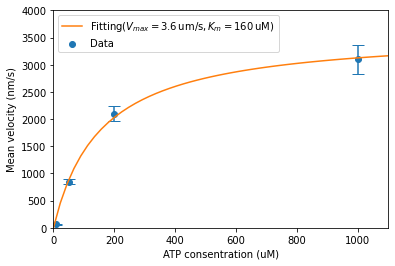

In [4]:
plt.figure()
plt.scatter(Sdata, Vdata,label=r'Data')
plt.errorbar(Sdata,Vdata,Vmeanerr,linestyle="None", capsize=6)
XMAX = 1100
X = np.linspace(0,XMAX)
plt.plot(X,f(X,Vm,Km), label=r'Fitting($V_{max}=3.6\,$um/s,$\,$$K_m=160\,$uM)')
plt.xlabel('ATP consentration (uM)')
plt.ylabel('Mean velocity (nm/s)')
plt.xlim(0,XMAX)
plt.ylim(0,4000)
plt.legend()
plt.show()